<a href="https://colab.research.google.com/github/zihanmanbit/Simple-Linear-Regression-Projects/blob/main/Simple_Linear_Regression_Revenue_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROBLEM STATEMENT
- You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC).
- Dataset:
 -   Input (X): Outside Air Temperature
 -   Output (Y): Overall daily revenue generated in dollars





# DATASET
[**IceCreamData.csv**](./IceCreamData.csv)

# IMPORTING LIBRARIES AND DATASETS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sales_df=pd.read_csv('IceCreamData.csv')

In [3]:
sales_df

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194
...,...,...
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304


In [4]:
sales_df.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [5]:
sales_df.tail()

,Temperature,Revenue
495,22.274899,524.746364
496,32.893092,755.818399
497,12.588157,306.090719
498,22.362402,566.217304
499,28.957736,655.660388


In [6]:
sales_df.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


In [7]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  500 non-null    float64
 1   Revenue      500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


**PRACTICE OPPORTUNITY #1 [OPTIONAL]:**
- **Calculate the average and maximum temperature and revenue using an alternative method.**

In [8]:
sales_df.mean()

,0
Temperature,22.232225
Revenue,521.570777


In [9]:
sales_df.max()

,0
Temperature,45.0
Revenue,1000.0


# PERFORMING DATA VISUALIZATION

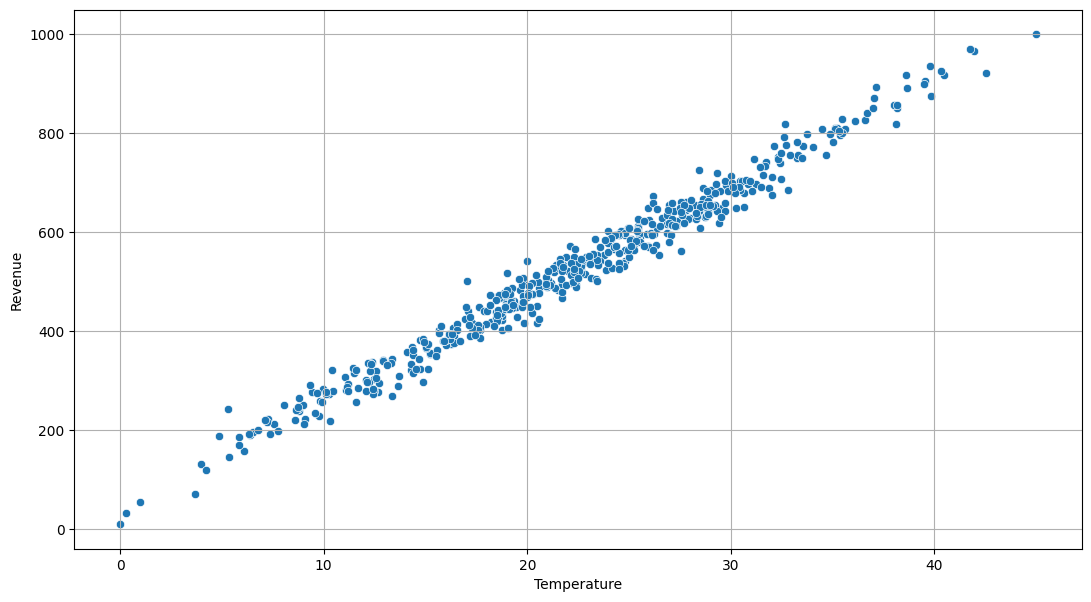

In [10]:
plt.figure(figsize=(13,7))
sns.scatterplot(x='Temperature',y='Revenue',data=sales_df)
plt.grid()

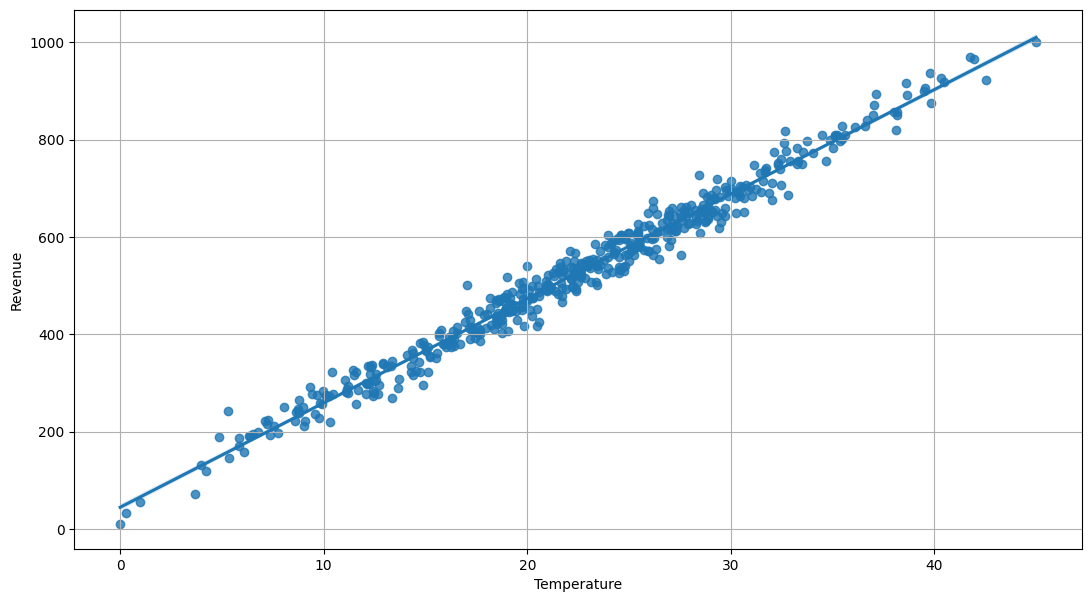

In [11]:
plt.figure(figsize=(13,7))
sns.regplot(x='Temperature',y='Revenue',data=sales_df)
plt.grid()

# CREATING TESTING AND TRAINING DATASET

In [12]:
X=sales_df['Temperature']
y=sales_df['Revenue']

In [13]:
X=np.array(X)
y=np.array(y)

In [14]:
# reshaping the array from (500,) to (500, 1)
X = X.reshape(-1,1)
print(X.shape)

# reshaping the array from (500,) to (500, 1)
y = y.reshape(-1,1)
print(y.shape)

(500, 1)
(500, 1)


In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [16]:
X_train.shape

(400, 1)

In [17]:
y_train.shape

(400, 1)

In [18]:
X_test.shape

(100, 1)

In [19]:
y_test.shape

(100, 1)

**PRACTICE OPPORUNITY #2 [OPTIONAL]:**
- **Change the split ratio to allocate 30% for testing and 70% for training.**
- **Confirm that the train test split process is successful.**

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [21]:
X_train.shape

(350, 1)

In [22]:
y_train.shape

(350, 1)

In [23]:
X_test.shape

(150, 1)

In [24]:
y_test.shape

(150, 1)

# TRAINING A SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [26]:
X_train.shape

(400, 1)

In [27]:
y_train.shape

(400, 1)

In [28]:
from sklearn.linear_model import LinearRegression

SimpleLinearRegression=LinearRegression(fit_intercept=True)
SimpleLinearRegression.fit(X_train,y_train)

LinearRegression()

In [29]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[21.39750831]]
Linear Model Coeff(b) [46.51600551]


**PRACTICE OPPORTUNITY #3 [OPTIONAL]:**
- **Set the fit_intercept attribute to False and retrain the model. What do you notice?**

In [30]:
SimpleLinearRegression=LinearRegression(fit_intercept=False)
SimpleLinearRegression.fit(X_train,y_train)

LinearRegression(fit_intercept=False)

In [31]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[23.23824156]]
Linear Model Coeff(b) 0.0


In [32]:
SimpleLinearRegression=LinearRegression(fit_intercept=True)
SimpleLinearRegression.fit(X_train,y_train)

LinearRegression()

In [33]:
print('Linear Model Coeff(m)', SimpleLinearRegression.coef_)
print('Linear Model Coeff(b)', SimpleLinearRegression.intercept_)

Linear Model Coeff(m) [[21.39750831]]
Linear Model Coeff(b) [46.51600551]


# EVALUATING TRAINED SIMPLE LINEAR REGRESSION MODEL IN SCIKIT LEARN

Text(0.5, 1.0, 'Revenue Generated vs. Temperature (Training dataset)')

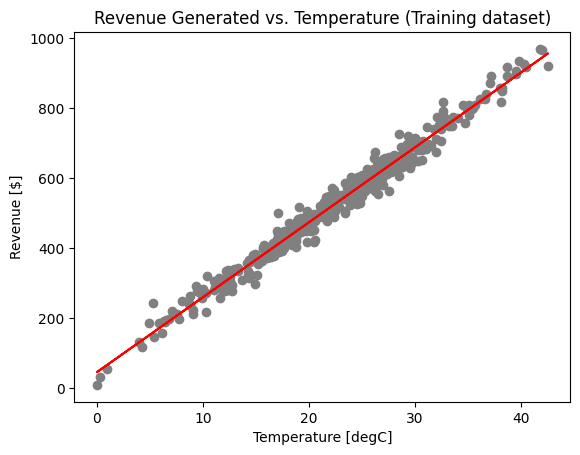

In [34]:
plt.scatter(X_train,y_train,color='gray')
plt.plot(X_train,SimpleLinearRegression.predict(X_train),color='red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs. Temperature (Training dataset)')

In [35]:
accuracy_LinearRegression = SimpleLinearRegression.score(X_test, y_test)
accuracy_LinearRegression

0.980328682639889

Text(0.5, 1.0, 'Revenue Generated vs Temperature (Testing dataset)')

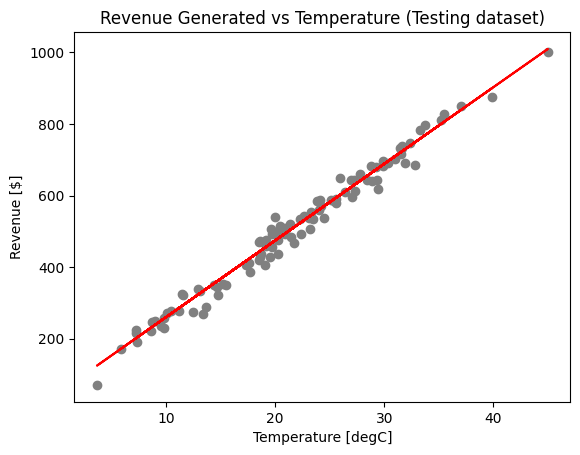

In [36]:
plt.scatter(X_test,y_test,color='gray')
plt.plot(X_test,SimpleLinearRegression.predict(X_test),color='red')
plt.ylabel('Revenue [$]')
plt.xlabel('Temperature [degC]')
plt.title('Revenue Generated vs Temperature (Testing dataset)')

In [37]:
# Using the trained model to generate predictions
Temp = np.array([20])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)

Revenue Predictions = [[474.46617163]]


**PRACTICE OPPORTUNITY #4 [OPTIONAL]:**
- **Try at least 3 temperature values and record the output.**
- **Perform a sanity check.**

In [38]:
Temp = np.array([7])
Temp = Temp.reshape(-1,1)
Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)

Temp = np.array([29])
Temp = Temp.reshape(-1,1)
Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)

Temp = np.array([42])
Temp = Temp.reshape(-1,1)

Revenue = SimpleLinearRegression.predict(Temp)
print('Revenue Predictions =', Revenue)

Revenue Predictions = [[196.29856366]]
Revenue Predictions = [[667.04374639]]
Revenue Predictions = [[945.21135437]]
